In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import madrigalWeb.madrigalWeb
import os
import h5py
import numpy as np

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2024"

maddat = madrigalWeb.madrigalWeb.MadrigalData('https://data.amisr.com/madrigal/')

In [3]:
#instrument codes for AMISR
instcodes={'PFISR':61,
          'RISR-N':91,
          'RISR-C':92}

In [4]:
#start time
st=datetime.datetime(2018,12,22,0,0,0)
et=datetime.datetime(2018,12,23,0,0,0)
expList = maddat.getExperiments(instcodes['PFISR'],
                st.year, st.month, st.day, st.hour, st.minute, st.second,
                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 30002619
realUrl: http://data.amisr.com/madrigal/showExperiment/?experiment_list=30002619
url: http://data.amisr.com/madrigal/madtoc/experiments0/2018/pfa/22dec18h
name: PLCal30 - Plasma line calibration run
siteid: 3
sitename: SRI
instcode: 61
instname: Poker Flat IS Radar
startyear: 2018
startmonth: 12
startday: 22
starthour: 18
startmin: 0
startsec: 49
endyear: 2018
endmonth: 12
endday: 23
endhour: 0
endmin: 0
endsec: 4
isLocal: True
madrigalUrl: http://https://data.amisr.com/madrigal
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1720748314
access: 0
Madrigal version: 3.4



In [5]:
# Get all the files associated with the experiment:
fileList = maddat.getExperimentFiles(expList[0].id)
for file in fileList:
    print(os.path.basename(file.name),'\tkindat:',file.kindat,'desc:',file.kindatdesc)

pfa20181222.008_ac_nenotr_01min.002.h5 	kindat: 1000201 desc: Ne From Power - Alternating Code (E-region) - 1 min
pfa20181222.008_ac_fit_01min.002.h5 	kindat: 2000201 desc: Fitted - Alternating Code (E-region) - 1 min
pfa20181222.008_ac_nenotr_03min.002.h5 	kindat: 1000203 desc: Ne From Power - Alternating Code (E-region) - 3 min
pfa20181222.008_ac_fit_03min.002.h5 	kindat: 2000203 desc: Fitted - Alternating Code (E-region) - 3 min
pfa20181222.008_ac_nenotr_05min.002.h5 	kindat: 1000205 desc: Ne From Power - Alternating Code (E-region) - 5 min
pfa20181222.008_ac_fit_05min.002.h5 	kindat: 2000205 desc: Fitted - Alternating Code (E-region) - 5 min
pfa20181222.008_lp_nenotr_01min.002.h5 	kindat: 1000101 desc: Ne From Power - Long Pulse (F-region) - 1 min
pfa20181222.008_lp_fit_01min.002.h5 	kindat: 2000101 desc: Fitted - Long Pulse (F-region) - 1 min
pfa20181222.008_lp_nenotr_03min.002.h5 	kindat: 1000103 desc: Ne From Power - Long Pulse (F-region) - 3 min
pfa20181222.008_lp_fit_03min.002

In [6]:
fileList = maddat.getExperimentFiles(expList[0].id)
lpfile=None
for file in fileList:
    if 'Ne From Power' in file.kindatdesc:
        if 'F-region' in  file.kindatdesc:
            if '5 min' in  file.kindatdesc:
                lpfile=file
                break
        
filename     = lpfile.name
outfilename  = os.path.basename(lpfile.name)
result = maddat.downloadFile(filename, outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [7]:
# Explore the HDF5 madrigal data from the first beam in /Data/Array Layout
with h5py.File(outfilename,'r') as f:
    for key1,val1 in f["/Data/Array Layout"].items():
        print(key1,val1)
        for key2,val2 in val1.items():
            print(" ",key2,val2) 
            try:
                for key3,val3 in val2.items():
                    print("   ",key3,val3)      
            except:
                pass
        break

Array with beamid=64016  <HDF5 group "/Data/Array Layout/Array with beamid=64016 " (5 members)>
  1D Parameters <HDF5 group "/Data/Array Layout/Array with beamid=64016 /1D Parameters" (11 members)>
    Data Parameters <HDF5 dataset "Data Parameters": shape (10,), type "|V88">
    azm <HDF5 dataset "azm": shape (71,), type "<f8">
    beamid <HDF5 dataset "beamid": shape (71,), type "<i8">
    cbadl <HDF5 dataset "cbadl": shape (71,), type "<f8">
    elm <HDF5 dataset "elm": shape (71,), type "<f8">
    numrxaeu <HDF5 dataset "numrxaeu": shape (71,), type "<f8">
    numtxaeu <HDF5 dataset "numtxaeu": shape (71,), type "<f8">
    pl <HDF5 dataset "pl": shape (71,), type "<f8">
    power <HDF5 dataset "power": shape (71,), type "<f8">
    rfreq <HDF5 dataset "rfreq": shape (71,), type "<f8">
    tfreq <HDF5 dataset "tfreq": shape (71,), type "<f8">
  2D Parameters <HDF5 group "/Data/Array Layout/Array with beamid=64016 /2D Parameters" (3 members)>
    Data Parameters <HDF5 dataset "Data Pa

In [8]:
with h5py.File(outfilename,'r') as f:
    PFISR_data = []
    for dat in f['Data/Array Layout'].values():
        outdct={}
        outdct['bid'] = dat['1D Parameters/beamid'][0]
        outdct['azm'] = dat['1D Parameters/azm'][0]
        outdct['elm'] = dat['1D Parameters/elm'][0]
        outdct['ne'] = 10**(dat['2D Parameters/popl'][:])
        outdct['dne'] = 10**(dat['2D Parameters/dpopl'][:])
        
        outdct['range'] = dat['range'][:]
        outdct['altitude'] = outdct['range']*np.sin(np.radians(outdct['elm']))
        tstmp = dat['timestamps'][:]
        outdct['time'] = [datetime.datetime.utcfromtimestamp(t) for t in tstmp]
        PFISR_data.append(outdct)

In [9]:
for i,d in enumerate(PFISR_data):
    print(d['bid'],d['azm'],d['elm'])

64016 14.039999961853027 90.0
64112 -154.3000030517578 84.5
64124 -154.3000030517578 80.5
64157 -154.3000030517578 77.5
64982 15.0 74.0
65162 15.0 83.0


In [10]:
#find the vertical beam and a down-range beam to the north
bver_ind  = np.argmin(np.abs(np.array([x['elm'] for x in PFISR_data]) - ( 90.0)))
bdown_ind = np.argmin(np.abs(np.array([x['elm'] for x in PFISR_data]) - ( 74.0)))
bdat    = PFISR_data[bver_ind]
downdat = PFISR_data[bdown_ind]

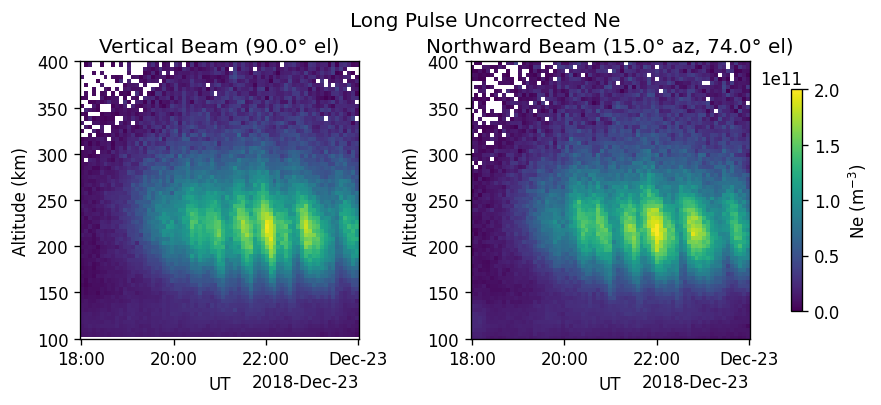

In [11]:
def format_axs(ax):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=4)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_ylim([100,400])
    ax.set_xlabel('UT')
    ax.set_ylabel('Altitude (km)')
    
fig,axarr=plt.subplots(1,2, figsize=(9,3), dpi=120, gridspec_kw=dict(wspace=0.4))
ax = axarr[0]
pcm = ax.pcolormesh(mdates.date2num(bdat['time']),bdat['altitude'],bdat['ne'],vmin=0,vmax=2e11,shading='nearest')
format_axs(ax)
ax.set_title(f"Vertical Beam ({bdat['elm']}\u00b0 el)")

ax=axarr[1]
pcm = ax.pcolormesh(mdates.date2num(downdat['time']),downdat['altitude'],downdat['ne'],vmin=0,vmax=2e11,shading='nearest')
format_axs(ax)
ax.set_title(f"Northward Beam ({downdat['azm']}\u00b0 az, {downdat['elm']}\u00b0 el)")

fig.suptitle('Long Pulse Uncorrected Ne',y=1.02)

cb=plt.colorbar(pcm,ax=list(axarr), shrink = 0.8)
cb.set_label('Ne (m$^{-3}$)')

Text(0.5, 1.0, 'Electron Densities at 220 km')

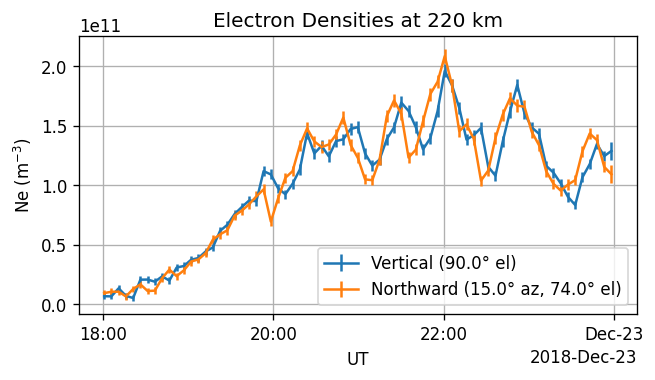

In [12]:
#overplot a slices at 220 km
a220v=np.argmin(np.abs(bdat['altitude']-220))

a220d=np.argmin(np.abs(downdat['altitude']-220))


fig,ax=plt.subplots(1,1, figsize=(6,3), dpi=120)
ax.errorbar(bdat['time'],bdat['ne'][a220v,:],yerr=bdat['dne'][a220v,:],label=f"Vertical ({bdat['elm']}\u00b0 el)")
ax.errorbar(downdat['time'],downdat['ne'][a220d,:],downdat['dne'][a220d,:],label=f"Northward ({downdat['azm']}\u00b0 az, {downdat['elm']}\u00b0 el)")

ax.legend()

locator = mdates.AutoDateLocator(minticks=3, maxticks=4)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_ylabel('Ne (m$^{-3}$)')
ax.set_xlabel('UT')
ax.grid()
ax.set_title('Electron Densities at 220 km')

# Questions

1. What is happening in the F-region ionosphere on this day?

2. How do the densities in the northward beam and vertical beam differ? What causes this difference?